In [28]:
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [117]:
import json
import random
from copy import deepcopy


sample_response = {
    "FetchDetails": {
            "TransactionDetails": {
                "ServiceName" : "Airtel Mobile",
                "officeID":"DDD1",
                "BillAmount": "941.00",
                "ConsumerName": "Chetan Kumar Yadav",
                "consumerKeysValues": "9352423664",
                "partPaymentAllow": "1",
                "partPaymentType": "Both",
                "lookUpId": "6163298"
                },
            "BillDateils": [
                {"LableName": "Consumer Name", "LableValue": "Chetan Kumar Yadav" },
                { "LableName": "Account Number", "LableValue": "1116231291" },
                { "LableName": "Mobile Number", "LableValue": "9352423664" },
                { "LableName": "Amount Before Due Date", "LableValue": "931.00" },
                { "LableName": "Amount After Due Date", "LableValue": "941.00" },
                { "LableName": "Due Date", "LableValue": "NA" },
                { "LableName": "Bill Date", "LableValue": "NA" },
                { "LableName": "Bill Cycle", "LableValue": "NA" },
                { "LableName": "Bill Number", "LableValue": "NA" }
            ]
        }
}

first = 'Aaditya,Abhinav,Abhishek,Aditya,Aishwarya,Amit,Anjali,Ankit,Anusha,Arjun,Aryan,Ashish,Aswini,Deepak,Gayatri,Ira,Isha,Ishita,Karan,Manoj,Mayank,Naveen,Neeraj,Neha,Niharika,Nikita,Parth,Pavithra,Pranav,Priyanka,ROHIT,Raj,Rohan,Sakshi,Sam,Shreya,Sneha,Soham,Suhani,Tanya,Vinay,ajith,akash,ananya,ankur,divya,kumar,leah,mahesh,natasha,priya,rahul,rakesh,ramya,riya,sanjana,seema,shivangi,shivani,shyam,simran,tanvi,vani,varsha,vivek,yash'.split(',')
last = 'Rathod,Chouhan,Thakur,Gehlot,Sharma,Jain,Mehta,Soni,Parikh,Saxena,Paliwal,Gupta,Jhala,Solanki,Parmar,Sisodia'.split(',')
def get_random_name():
    return random.choice(first).title() + ' ' + random.choice(last).title()

def get_response(ssoid, srvid, searchKey):
    """Until I figure out how to make the API work. dummy responses"""
    new_dict = deepcopy(sample_response)
    new_dict['FetchDetails']['TransactionDetails']['consumerKeysValues'] = searchKey
    new_dict['FetchDetails']['TransactionDetails']['ConsumerName'] = get_random_name()
    new_dict['FetchDetails']['TransactionDetails']['BillAmount'] = str(random.random() * 1000)
    return new_dict

def gen_phone(phones=[random.choice('987') + ''.join(random.choice('1234567890') for _ in range(9)) for _ in range(500)]):
    phone = random.choice(phones)
    return phone

def gen_ssoid(nos=[int(random.random()*1000) for _ in range(100)]):
    return random.choice(nos)

def gen_srvid(nos=[1214, 1220, 1216, 1219, 1907, 1222]):
    return random.choice(nos)

In [118]:
df = pd.read_csv('../districts.txt')
df['density'] = df['pop'] / df.area

In [119]:
data = []
for hq, density in df[['hq', 'density']].values:
    for iteration in range(int(round(density))):
        ssoid, srvid, phone = gen_ssoid(), gen_srvid(), gen_phone()
        req = get_response(ssoid, srvid, phone)
        
        amount = random.random() *( (density ** 2) / 100)
        
        row = (hq, ssoid, srvid, phone, amount)
        data.append(row)

In [120]:
agg = pd.DataFrame(data, columns=['hq', 'ssoid', 'srvid', 'phone', 'BillAmount'])
agg.shape

(8345, 5)

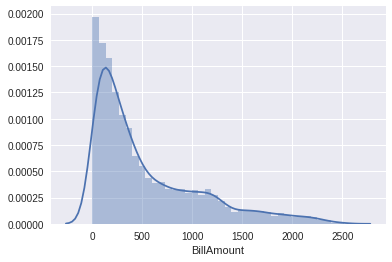

In [121]:
sns.distplot(agg.BillAmount)

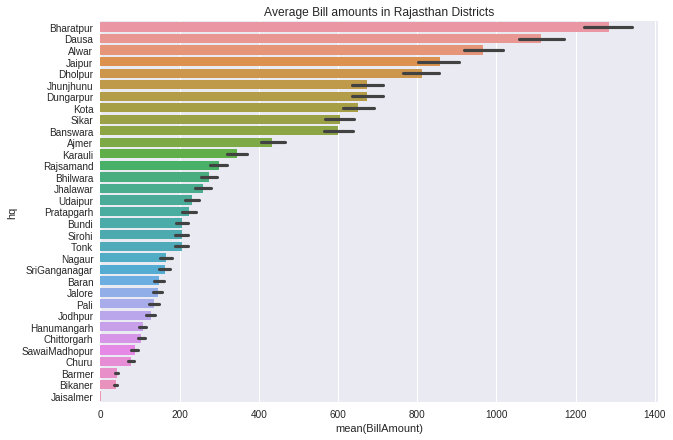

In [122]:
order = [(v, k) for k, v in dict(agg.groupby('hq')['BillAmount'].mean()).items()]
order.sort(key=lambda x: x[0], reverse=True)
order = [i[1] for i in order]
order[:10]

plt.figure(figsize=(10, 7))
sns.barplot(x='BillAmount', y='hq', data=agg, order=order)
plt.title('Average Bill amounts in Rajasthan Districts')

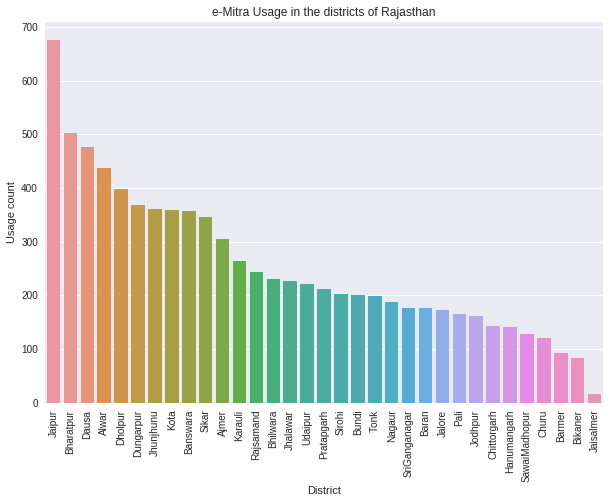

In [126]:
agg['instance'] = 1
order = [(v, k) for k, v in dict(agg.groupby('hq')['instance'].count()).items()]
order.sort(key=lambda x: x[0], reverse=True)
order = [i[1] for i in order]
order[:10]

plt.figure(figsize=(10, 7))
sns.countplot(agg.hq, order=order)
ax = plt.gca()
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
plt.xlabel('District')
plt.ylabel('Usage count')
plt.title('e-Mitra Usage in the districts of Rajasthan')